In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0
[0] Write a function `convert(angle)` to convert angles in degrees to radians. Write another function `recenter(angle)` to wrap angles in radian into the $(-\pi,\pi]$ interval. Save those two functions into a file named `anglesutils.py`.

A centrifuge's loading position at $t=0\,\text{s}$ is $45^\circ$ degrees, and start accelerating at $\alpha=2^{\circ}\,\text{s}^{-2}$. So it's position in degrees is given as a function of time (in seconds) by:

$$
position(t)=45+\frac{1}{2}\,2\,t^2
$$

Use the `anglesutils` module you just created to plot that function from $t=0\,\text{s}$ to $t=30\,\text{s}$ in radian in the $(-\pi,\pi]$ interval.

(this exercise is for demonstration purposes and won't be marked)

In [32]:
%%writefile anglesutils.py
import numpy as np

def convert(angle):
  '''
  Takes in an angle in degrees, and returns the angle in radians.
  '''
  return angle * np.pi / 180

def recenter(angle):
  '''
  Takes in an angle in radians, and returns the angle in the range (−π,π].
  '''
  return (angle + np.pi) % (2 * np.pi) - np.pi
  # (angle + pi) shifts the angle so the modulo operation wraps correctly, % (2*pi) sets it in the range (0,2π], and -pi shifts it to (−π,π].

Overwriting anglesutils.py


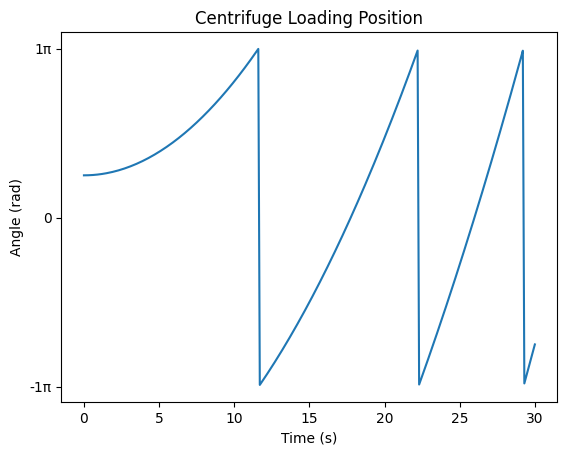

In [41]:
import anglesutils as au

t=np.linspace(0,30,301)

# calculate the angular positions (in degrees) and convert them to radians, then recenter the values
positions=au.recenter(au.convert(45+t**2))

fig, ax = plt.subplots()
ax.plot(t,positions)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (rad)')
ax.set_title('Centrifuge Loading Position')
# setting the y axis to be separated by pi, and to format the text to count in multiples of pi
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: f'{int(val / np.pi)}π' if val != 0 else '0'))

## Exercise 1

[4] Define a function `func1(time,amplitude,frequency,phase)` which returns a sine wave (as a function of time) of chosen amplitude, frequency and phase. Test it out with different amplitude, frequency and phase values by plotting suitable graphs. Set the default values for ampliture, frequency and phase to be 1, 1 and 0, respectively.

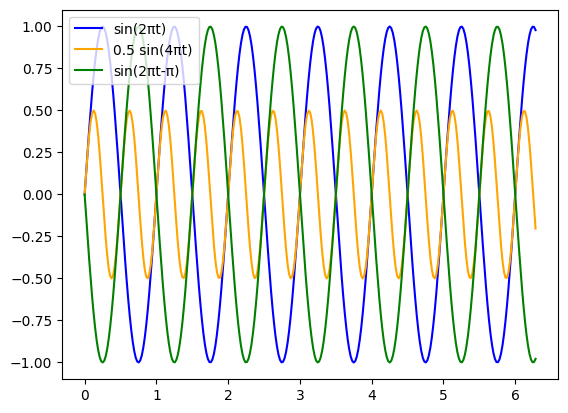

In [43]:
def func1(time,amplitude=1,frequency=1,phase=0):
  '''
  This function returns a sine wave of chosen amplitude, frequency and phase. Defaults set to 1, 1, and 0 respectively.
  '''
  return amplitude * np.sin(2*np.pi*frequency*time - phase)

# define the t values to use for plotting the different sine waves
t=np.linspace(0,2*np.pi,301)

# plotting the three functions with differing parameters on the same graph for comparison. A legend is included.
fig, ax = plt.subplots()
ax.plot(t,func1(t),'blue',label='sin(2πt)') # default parameter wave

ax.plot(t,func1(t,amplitude=0.5,frequency=2),'orange',label='0.5 sin(4πt)') # 0.5 amplitude, 2 frequency wave

ax.plot(t,func1(t,phase=np.pi),'green',label='sin(2πt-π)') # phase of pi wave
ax.legend()

## Exercise 2

A satellite has a circular orbit around the Earth with a period $T$.
  1. [2] Prove that its altitude $h$ above the Earth‘s surface is ($M$ is Earth’s mass and $R$ its radius):
$$h={\left ( \frac{GMT^2}{4\pi^2} \right )}^{1/3} - R$$
    * Write the proof in Markdown in the notebook directly, no need to use python.
    * Follow the [markdown guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb) if you need some help with Markdown.
    * Do pay particular attention to the `Equations:` section, and the linked [LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics ) wikibook to make nicely formatted equations. You will need this for the assignments.
  2. [2] Write a function to evaluate $h$.
  3. [2] Write a program that requests user input of $T$ and then prints out the altitude in kilometre
  4. [2] Hence find the altitudes of satellites that orbit the Earth once a day (‘geosynchronous’ orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?

**1.**

SHM tells us that $a=ω^2r$, where $\omega=\frac{2π}{T}$. Subbing this into the acceleration gives $a=\frac{4π^2r}{T^2}$

This acceleration is provided by the acceleration due to gravity, $a=\frac{GM}{r^2}$.

Therefore equating the two gives:

$\frac{GM}{r^2}=\frac{4π^2r}{T^2}$

Substituting in the radius of the orbit $r=R+h$:

$\frac{GM}{(R+h)^2}=\frac{4π^2(R+h)}{T^2}$

$(R+h)^3=\frac{GMT^2}{4π^2}$

$h=(\frac{GMT^2}{4π^2})^{1/3}-R$

In [35]:
# 2.

def h_eval(T,M=5.9722e24,R=6.378e6):
  '''
  Takes a value of T, the time period of the orbit, and optional values of M and R (default to earth); returns the height above surface of the orbit,
  calculated using the equation above.
  '''
  return ((6.674e-11*M*T**2)/(4*np.pi**2))**(1/3)-R

# 3.
def print_h():
  '''
  This code asks for the user to input the time period, and then prints the evaluated h value to the nearest whole number.
  This is a function purely so it doesn't need to be copied and pasted three times below.
  '''
  T=int(input("What is the period of the orbit?"))
  print(f"The height of an orbit of {T}s is {h_eval(T)/1000:.0f} kilometres.")

In [36]:
# 4.
# 24 hours
print_h()

What is the period of the orbit?86400
The height of an orbit of 86400s is 35863 kilometres.


In [37]:
# 90 mins
print_h()

What is the period of the orbit?5400
The height of an orbit of 5400s is 274 kilometres.


In [38]:
# 45 mins
print_h()

What is the period of the orbit?2700
The height of an orbit of 2700s is -2187 kilometres.


>This final calculation shows that the radius of the orbit would have to be 2000 kilometers **below** the Earth's surface to have a period of 45 minutes.

## Exercise 3

  1. [4] Write a function `linfit(x,y)` to perform a least squares fit of data using the method described last year in PX1224 week 4 to return estimates of slope and intercept (and their errors).
  2. [2] Put your functions into your own package, using a suitable file name. Type the code you want to be in the package (including comments!) in a cell of the notebook, pick a name for the file and add `%%writefile <file_name>.py` at the top of the cell to have the notebook create the file.
  3. [2] Test out your package by importing it, defining some test data and plotting a graph of the data and fitted straight line. (Label the axes and give the graph a title.)

**IMPORTANT**: The `linfit` function itself must be self contained. It must only take in the x- and y-data, and return m, dm, c and dc. It must not do anything else, such as print or plot data - that should all be done outside the function.

In [39]:
%%writefile fits.py
import numpy as np
# 1.
def linfit(x,y):
  '''
  Takes in x data and y data and returns the values of the gradient, y intercept and their errors, using the least squares method.
  '''
  # finding 1st order line of best fit
  p_coeff, residuals, _, _, _ = np.polyfit(x,y,1,full=True)
  # finding the errors in values from lab book equations
  n = len(x)
  D = sum(x**2) - 1./n * sum(x)**2
  x_bar = np.mean(x)
  dm_squared = 1./(n-2)*residuals/D
  dc_squared = 1./(n-2)*(D/n + x_bar**2)*residuals/D
  # quoting to correct significant figures
  m=round(p_coeff[0],3)
  c=round(p_coeff[1],3)
  dm=round(np.sqrt(dm_squared)[0],3)
  dc=round(np.sqrt(dc_squared)[0],3)

  # returning the values of gradient, intercept and their errors
  return m, dm, c, dc

Overwriting fits.py


Text(0.5, 1.0, 'Least Squares Fit')

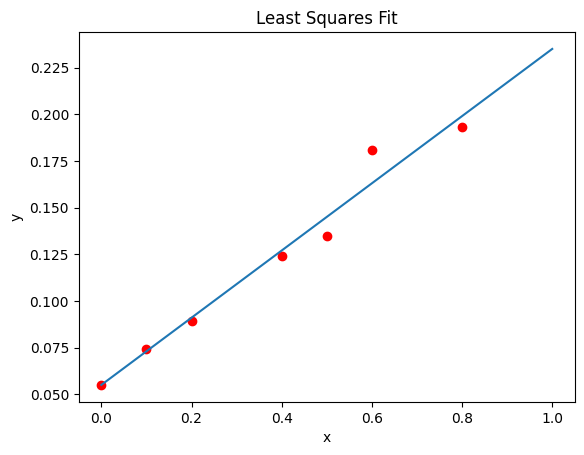

In [47]:
# 3.
import fits

x=np.array([0,0.1,0.2,0.4,0.5,0.6,0.8], dtype=float)
y=np.array([0.055,0.074,0.089,0.124,0.135,0.181,0.193], dtype=float)

m,dm,c,dc = fits.linfit(x,y)

x0=np.linspace(0,1,100)

fig, ax = plt.subplots()
ax.plot(x,y,'ro')
ax.plot(x0,m*x0+c)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Least Squares Fit')